# 1. Reading the data and understanding it

In [1]:
#Importing the necesaary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the data from csv file

df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#shape of data

df.shape

(730, 16)

In [6]:
#info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#describing the columns of dataframes

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#checking for null columns in the dataframe

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#dropping the duplicate columns

df.drop_duplicates(inplace=True)

In [10]:
#checking the shape after dropping duplicates

df.shape

(730, 16)

There are no duplicates in the dataset

In [11]:
#Dropping the unnecessary columns

df.drop(['dteday','registered','casual'],axis=1,inplace=True)

In [12]:
#checking the head after dropping the columns

df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#Gauging the weekday column

df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [14]:
# Gauging the mnth column

df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
# Gauging the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snow',4:'Heavy_snow'})

In [16]:
# Gauging the season column

df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'})

In [17]:
# Checking the head 

df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,2,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,3,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 79.8+ KB


# 2. Visualising the data

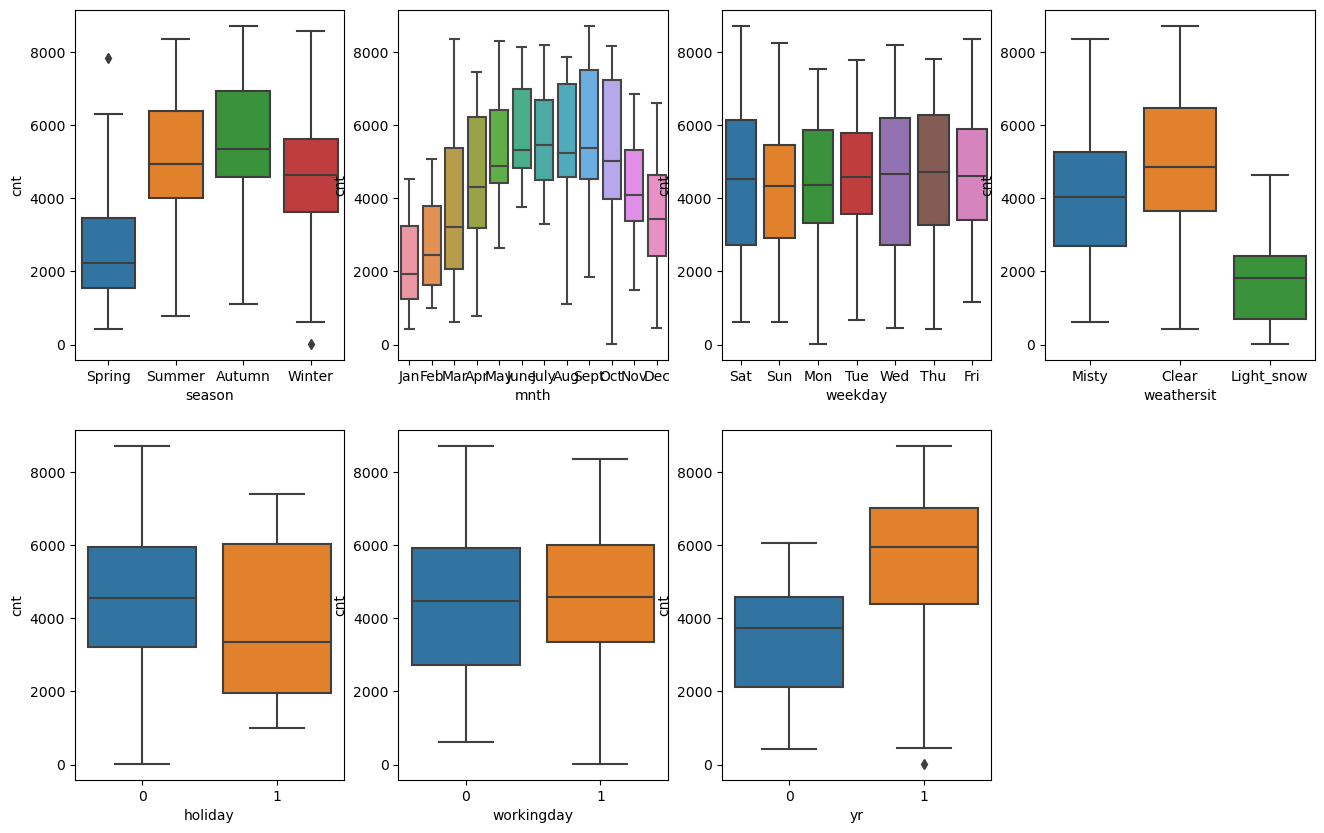

In [19]:
# Categorical columns are to be analysed

plt.figure(figsize=(16, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [20]:
#putting function to create categorical columns related barplot 

def plot_categ_columns(column):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

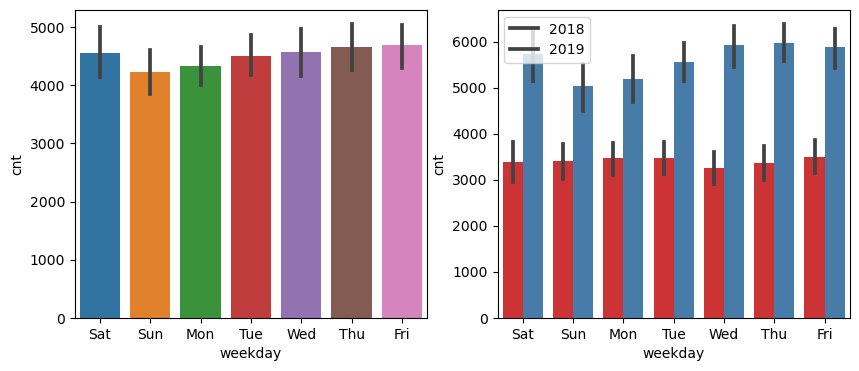

In [21]:
# Visualisation for weekday column

plot_categ_columns('weekday')

As compared to starting of the week Thursday,Friday,Saturday and Sunday have more bookings. 

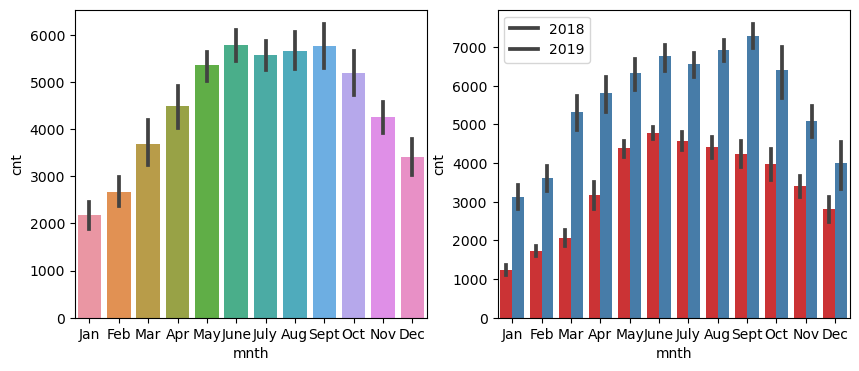

In [22]:
# Visualisation for month column

plot_categ_columns('mnth')

Number of bookings in each month seems to be increased from 2018 to 2019. Most of the bookings have been done in the month of May, June, July, Aug, Sept and Oct.

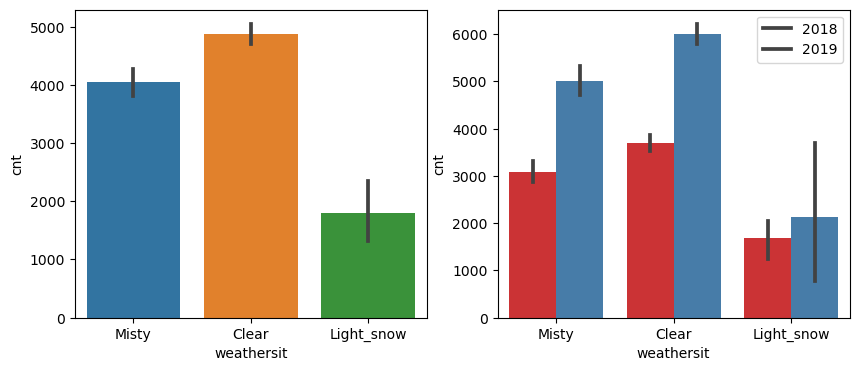

In [23]:
# Visualisation for weathersit column

plot_categ_columns('weathersit')

Bookings were more when the weather was clear. Compared to 2018, bookings for every weaather type increased in 2019.

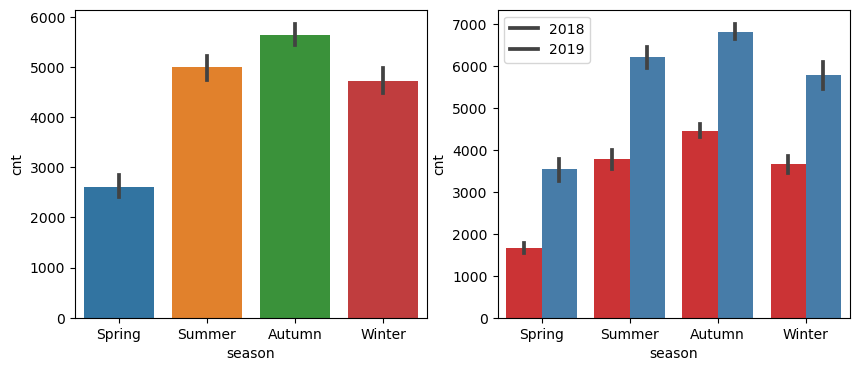

In [24]:
# Visualisation for season column

plot_categ_columns('season')

Autumn season has the most number of bookings. Also bookings in each season have increased from 2018 to 2019. 

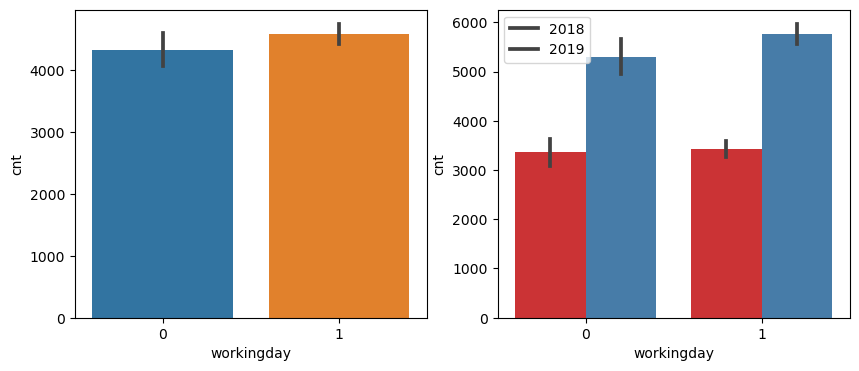

In [25]:
# plotting visualization for workingday column

plot_categ_columns('workingday')

Bookings were almost same be it working day or non working day however bookings were increased in 2019.

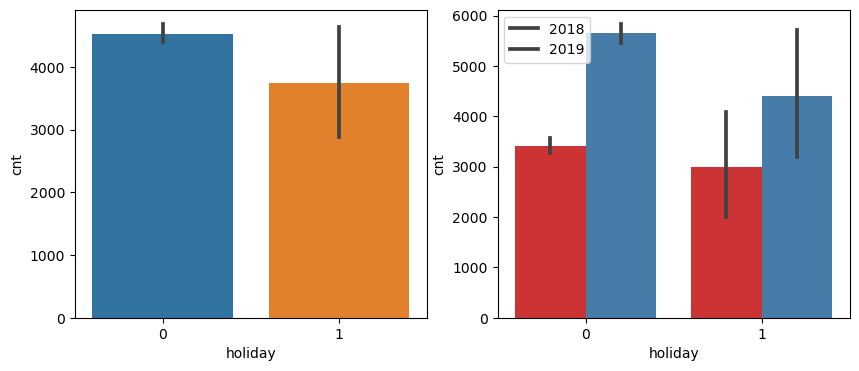

In [26]:
# plotting visualization for holiday column

plot_categ_columns('holiday')

More bookings were done on holidays rather the non holidays which is quite reasonable. 

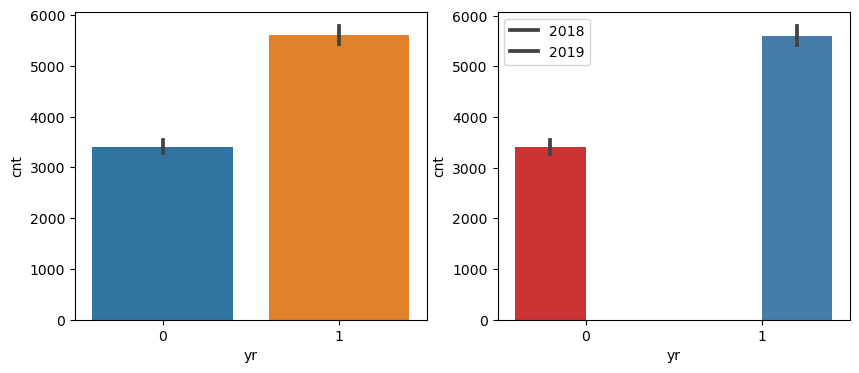

In [27]:
# plotting visualization for year column

plot_categ_columns('yr')

Year 2019 had more bookings than the previous year which shows good progress of business.

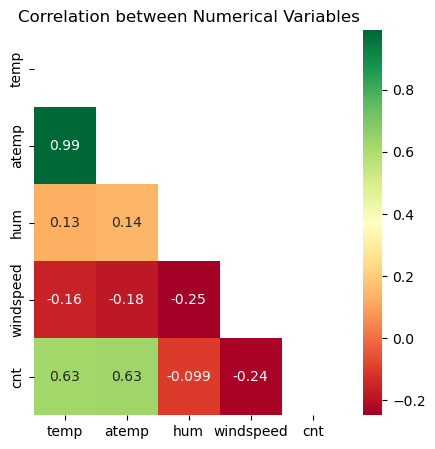

In [28]:
# Correlation between numerical variables

plt.figure(figsize = (5,5))
matrix = np.triu(df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

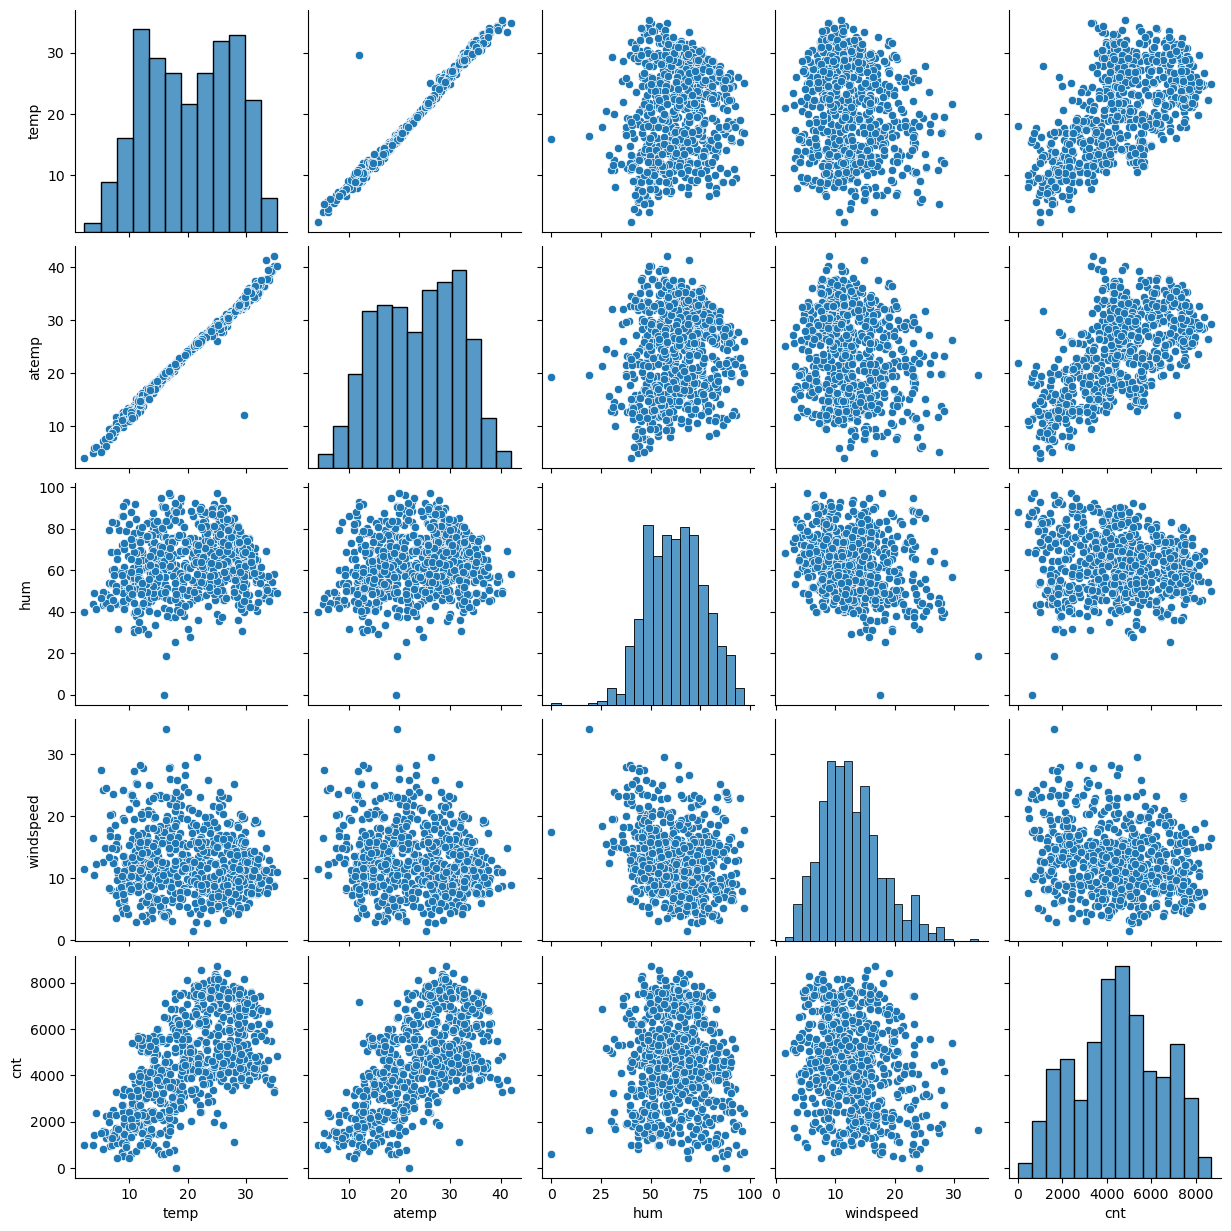

In [29]:
# Visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Linear relationship appears between temp and atemp. Both cannot be used due to multicolinearity.

# 3. Preparing the Data

In [32]:
# Creating dummy variables for weekday, month, weathersit and season columns

df_weekdays = pd.get_dummies(df.weekday,drop_first=True)
df_months = pd.get_dummies(df.mnth,drop_first=True)
df_weathersit = pd.get_dummies(df.weathersit,drop_first=True)
df_season = pd.get_dummies(df.season,drop_first=True)

In [34]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,2,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,3,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
# Merging the dataset with the dummy vairable dataset created earlier

df_1 = pd.concat([df,df_weekdays,df_months,df_weathersit,df_season],axis=1)

In [37]:
df_1.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Mar,May,Nov,Oct,Sept,Light_snow,Misty,Spring,Summer,Winter
0,1,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,...,0,0,0,0,0,0,1,1,0,0
1,2,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,...,0,0,0,0,0,0,1,1,0,0
2,3,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,...,0,0,0,0,0,0,0,1,0,0
3,4,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,0,1,0,0
4,5,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
 13  Mon         730 non-null    uint8  
 14  Sat         730 non-null    uint8  
 15  Sun         730 non-null    uint8  
 16  Thu         730 non-null    uint8  
 17  Tue         730 non-null    uint8  
 18  Wed         730 non-null    uint8  
 19  Aug         730 non-null    u

In [39]:
# Drop the columns out of which dummy variables created

df_1.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [40]:
# Checking the head of new dataframe

df_1.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,...,Mar,May,Nov,Oct,Sept,Light_snow,Misty,Spring,Summer,Winter
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,1,1,0,0
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,1,0,0
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df_1.shape

(730, 31)

# 4. Split Data into Training and Test 

In [44]:
# Splitting dataset into Training and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_1, train_size = 0.7, random_state = 100)

In [45]:
#Check shape of training dataset

df_train.shape

(510, 31)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     510 non-null    int64  
 1   yr          510 non-null    int64  
 2   holiday     510 non-null    int64  
 3   workingday  510 non-null    int64  
 4   temp        510 non-null    float64
 5   atemp       510 non-null    float64
 6   hum         510 non-null    float64
 7   windspeed   510 non-null    float64
 8   cnt         510 non-null    int64  
 9   Mon         510 non-null    uint8  
 10  Sat         510 non-null    uint8  
 11  Sun         510 non-null    uint8  
 12  Thu         510 non-null    uint8  
 13  Tue         510 non-null    uint8  
 14  Wed         510 non-null    uint8  
 15  Aug         510 non-null    uint8  
 16  Dec         510 non-null    uint8  
 17  Feb         510 non-null    uint8  
 18  Jan         510 non-null    uint8  
 19  July        510 non-null   

In [47]:
#Check shape of testing dataset

df_test.shape

(220, 31)

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     220 non-null    int64  
 1   yr          220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   workingday  220 non-null    int64  
 4   temp        220 non-null    float64
 5   atemp       220 non-null    float64
 6   hum         220 non-null    float64
 7   windspeed   220 non-null    float64
 8   cnt         220 non-null    int64  
 9   Mon         220 non-null    uint8  
 10  Sat         220 non-null    uint8  
 11  Sun         220 non-null    uint8  
 12  Thu         220 non-null    uint8  
 13  Tue         220 non-null    uint8  
 14  Wed         220 non-null    uint8  
 15  Aug         220 non-null    uint8  
 16  Dec         220 non-null    uint8  
 17  Feb         220 non-null    uint8  
 18  Jan         220 non-null    uint8  
 19  July        220 non-null   

In [52]:
# Using MinMaxScaler for Readjusting the features

Scaler = MinMaxScaler()

In [53]:
# Checking the head of dataset before adjusting.

df_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,...,Mar,May,Nov,Oct,Sept,Light_snow,Misty,Spring,Summer,Winter
576,577,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,...,0,0,0,0,0,0,0,0,0,0
426,427,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,...,1,0,0,0,0,0,1,1,0,0
728,729,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,...,0,0,0,0,0,0,0,1,0,0
482,483,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,...,0,0,0,0,0,0,1,0,1,0
111,112,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,...,0,0,0,0,0,0,1,0,1,0


In [56]:
# Applying scaler to all the columns except the 'dummy' and 'yes-no' variables

num_vars = ['temp','atemp','hum','cnt','windspeed']
df_train[num_vars] = Scaler.fit_transform(df_train[num_vars])

In [57]:
# Verifying the head after appying scaling/adjusting.

df_train.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,...,Mar,May,Nov,Oct,Sept,Light_snow,Misty,Spring,Summer,Winter
576,577,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,0,0,0,0,0,0,0
426,427,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,...,1,0,0,0,0,0,1,1,0,0
728,729,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,...,0,0,0,0,0,0,0,1,0,0
482,483,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,0,0,0,0,1,0,1,0
111,112,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,...,0,0,0,0,0,0,1,0,1,0


In [58]:
df_train.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,...,Mar,May,Nov,Oct,Sept,Light_snow,Misty,Spring,Summer,Winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,368.680392,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.150980,...,0.098039,0.084314,0.086275,0.084314,0.080392,0.029412,0.345098,0.243137,0.247059,0.247059
std,209.596164,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.358381,...,0.297660,0.278131,0.281045,0.278131,0.272166,0.169124,0.475867,0.429398,0.431725,0.431725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.250000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,373.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,552.750000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


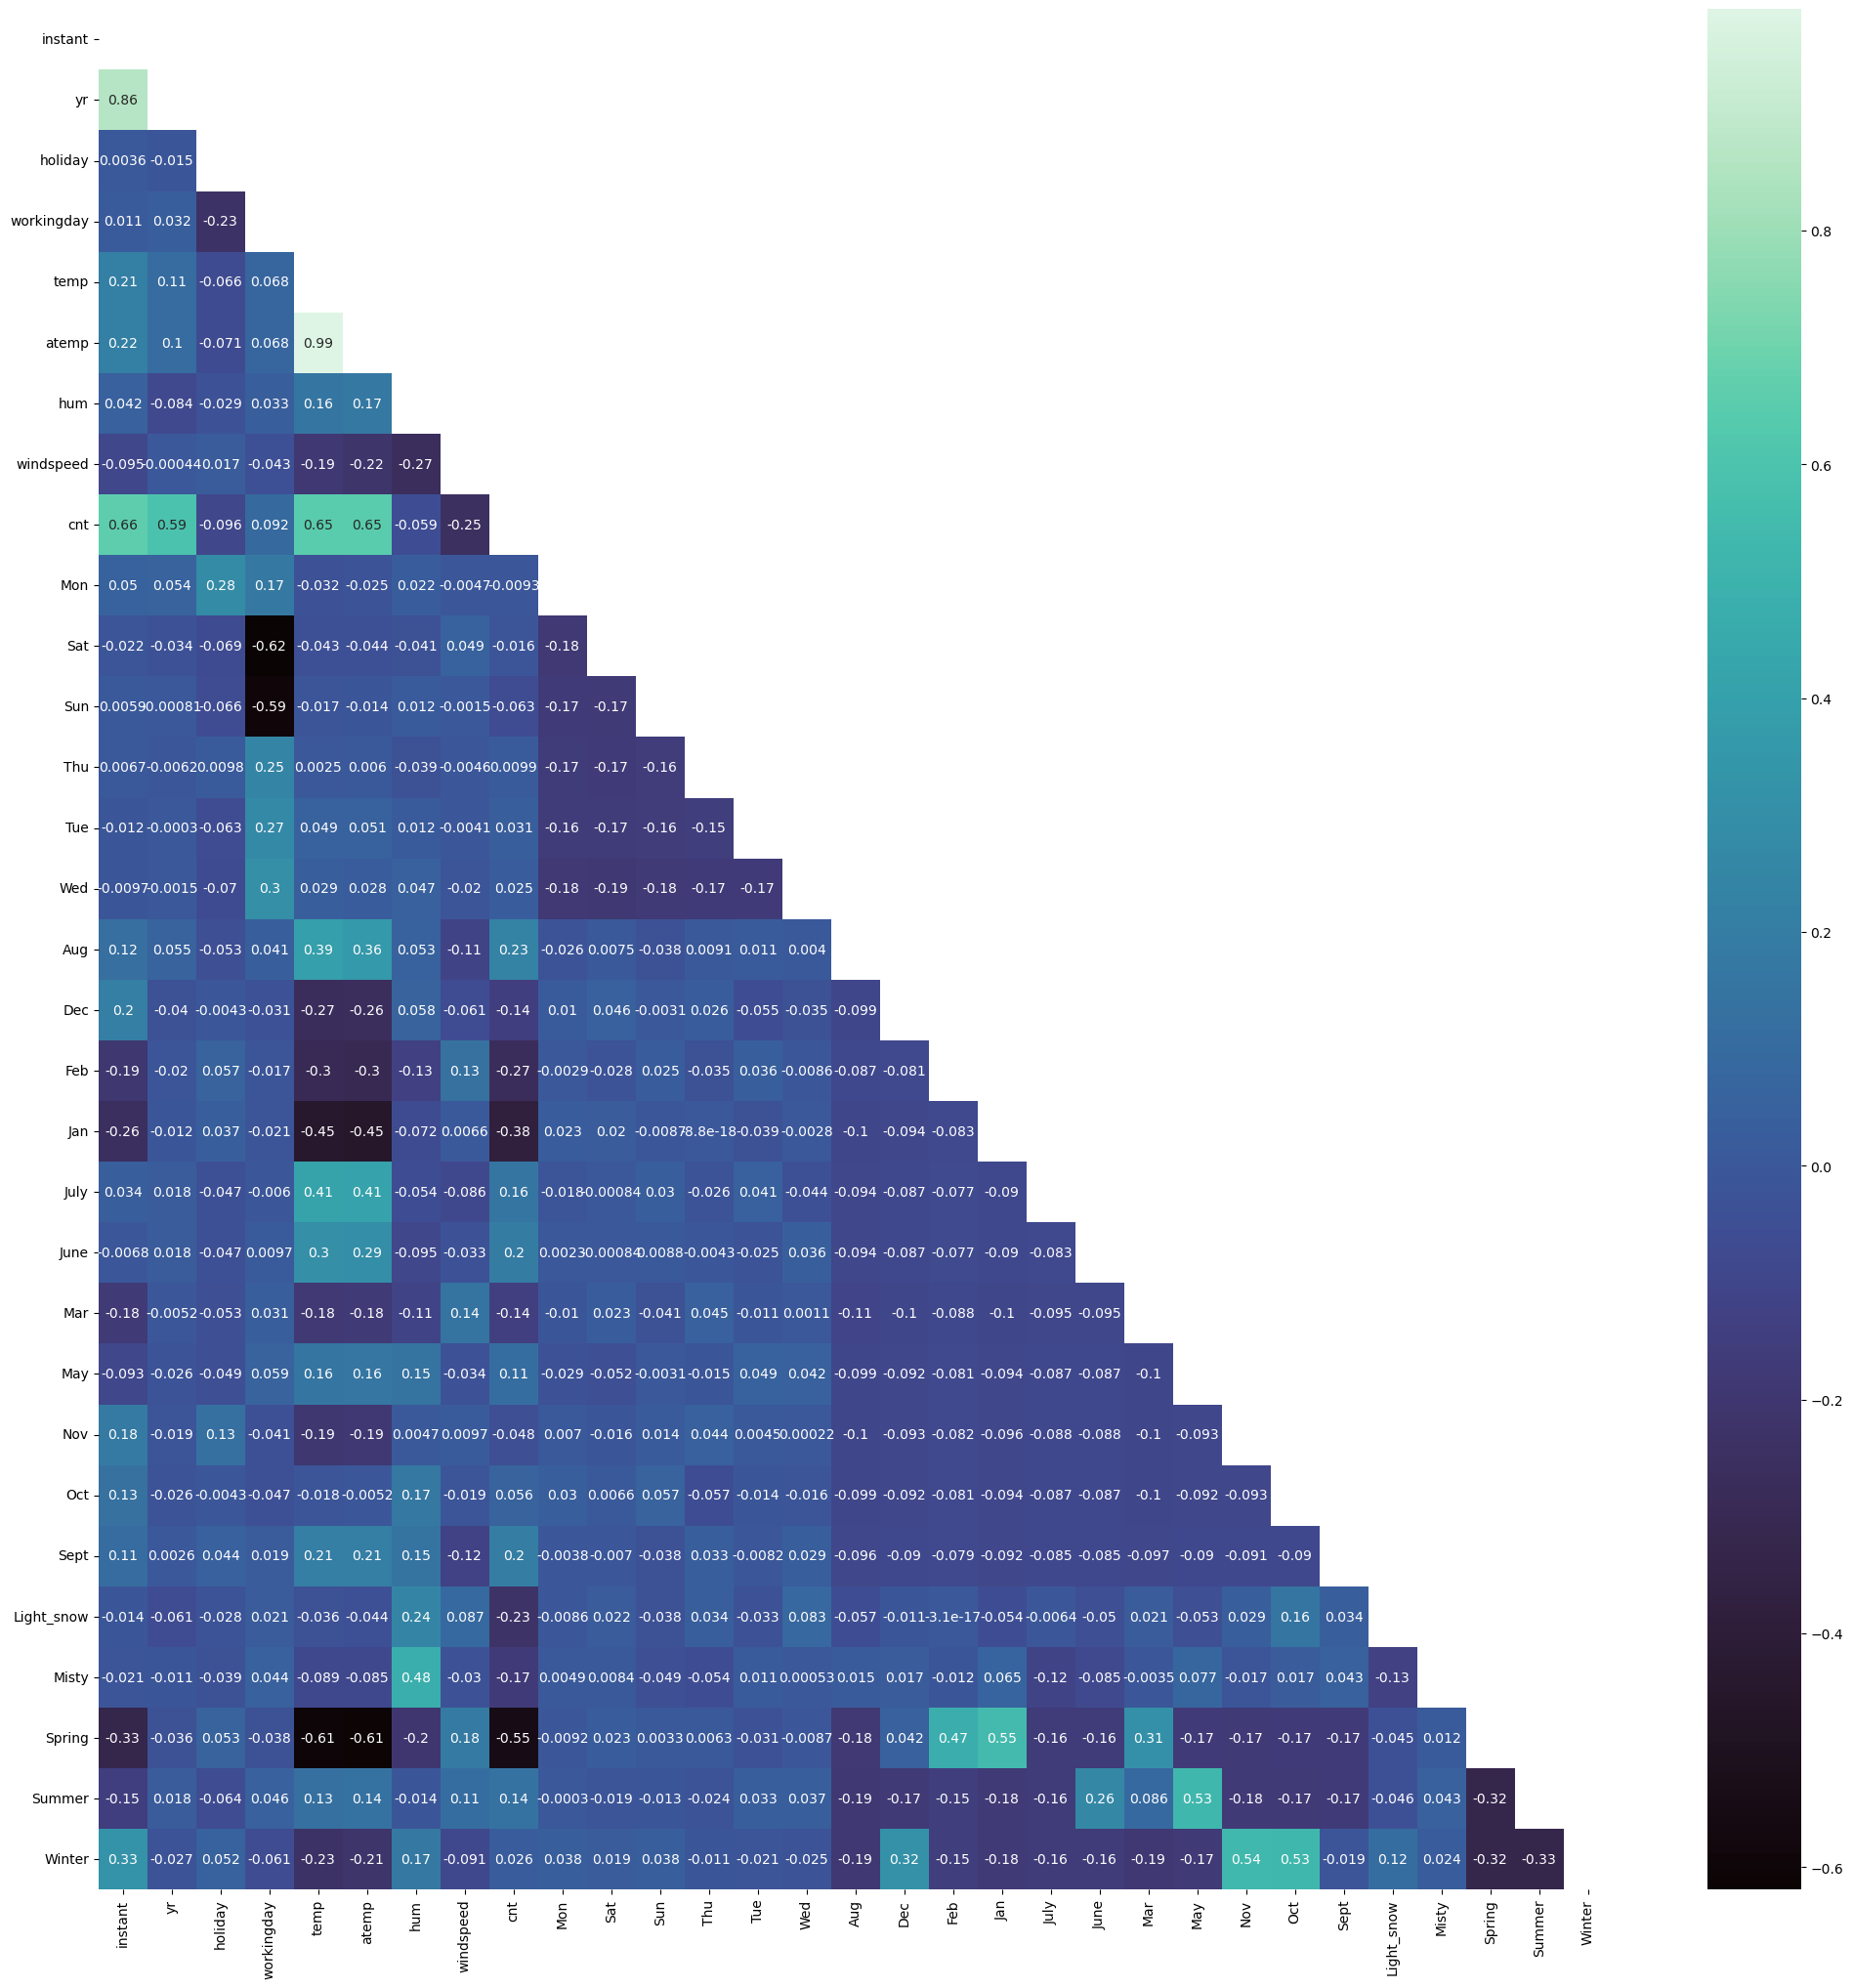

In [59]:
# checking the correlation coefficients to see which of the variables are highly correlated.

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="mako", mask=matrix)
plt.show()

Looking at the chart, Misty and humidity show correlation. Summer season with May month, Winter season with Oct and Spring season with Jan and Feb month too show decent correlation. Also, cnt looks to have correlation with variables year and temp.

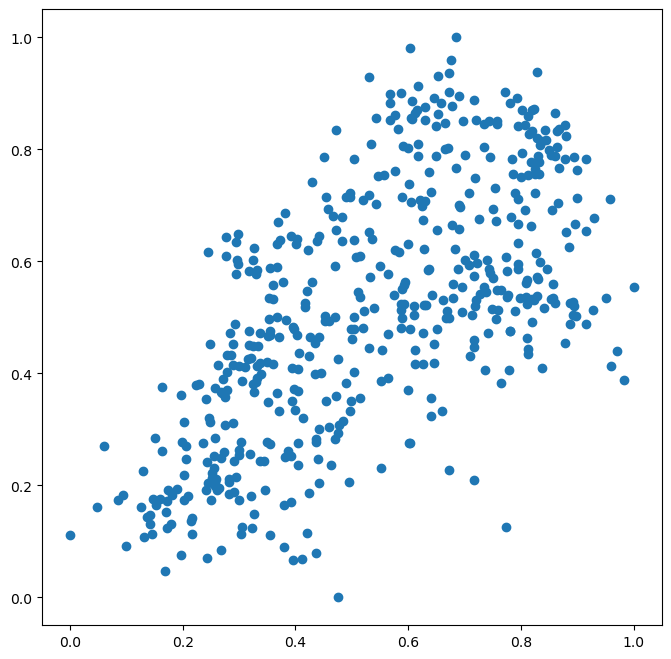

In [60]:
# Analysing one of the correlations to see trends.

plt.figure(figsize=[8,8])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Analysing confirms positive correlation between temp and cnt.

# 5. Building Linear Model

In [61]:
Y_train = df_train.pop('cnt')
X_train = df_train

In [69]:
# Eliminating recursive feature.

LM = LinearRegression()
LM.fit(X_train, Y_train)

rfe = RFE(LM,step =15)
rfe = rfe.fit(X_train,Y_train)

In [70]:
#List of variables that are selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('instant', False, 2),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 2),
 ('Sun', False, 2),
 ('Thu', False, 2),
 ('Tue', False, 2),
 ('Wed', False, 2),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sept', True, 1),
 ('Light_snow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [71]:
# selecting the selected variable through RFE in colm list

colm = X_train.columns[rfe.support_]
print(colm)

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Aug', 'Feb',
       'Jan', 'Sept', 'Light_snow', 'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')


In [72]:
# checking whether columns has been rejected

X_train.columns[~rfe.support_]

Index(['instant', 'workingday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Dec', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [73]:
# Generic function to calculate VIF (Variance Inflation Factor) of variables.

def calcVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [74]:
# RFE selected variables dataframe

X_train_rfe = X_train[colm]

In [75]:
# calculating VIF

calcVIF(X_train_rfe)

,Features,VIF
2,temp,381.77
3,atemp,371.15
4,hum,30.38
12,Spring,5.76
5,windspeed,4.91
14,Winter,3.87
13,Summer,3.25
11,Misty,2.29
8,Jan,2.13
0,yr,2.09


Humidity (Hum) is showing high VIF value.

In [78]:
# Creating 1st linear model

X_train_LM_1 = sm.add_constant(X_train_rfe)
LR_1 = sm.OLS(Y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.10e-187
Time:                        22:38:45   Log-Likelihood:                 510.82
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     494   BIC:                            -921.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2700      0.036      7.555      0.0

In [80]:
# Dropping humidity column as it shows high VIF value

X_train_1 = X_train_rfe.drop(['hum'], axis = 1)

In [81]:
# Running the function to calculate VIF for the new model

calcVIF(X_train_1)

,Features,VIF
2,temp,377.31
3,atemp,369.82
4,windspeed,4.87
11,Spring,4.11
12,Summer,2.47
0,yr,2.08
7,Jan,2.05
13,Winter,2.01
6,Feb,1.77
5,Aug,1.74


In [84]:
# Creating 2nd linear regression model

X_train_LM_2 = sm.add_constant(X_train_1)
LR_2 = sm.OLS(Y_train,X_train_LM_2).fit()
print(LR_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.26e-184
Time:                        22:51:07   Log-Likelihood:                 500.86
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     495   BIC:                            -908.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1924      0.032      6.061      0.0

In [88]:
# Dropping Jan column as it has high p-value

X_train_1 = X_train_1.drop(['Jan'], axis=1)

In [90]:
# Running the function to calculate VIF for the new model
calcVIF(X_train_1)

,Features,VIF
2,temp,377.26
3,atemp,369.62
4,windspeed,4.86
10,Spring,2.57
11,Summer,2.46
0,yr,2.07
12,Winter,2.01
5,Aug,1.73
9,Misty,1.58
6,Feb,1.39


In [92]:
# Creating 3rd linear regression model

X_train_LM_3 = sm.add_constant(X_train_1)
LR_3 = sm.OLS(Y_train,X_train_LM_3).fit()
print(LR_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.76e-184
Time:                        23:06:14   Log-Likelihood:                 497.90
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     496   BIC:                            -908.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1710      0.031      5.586      0.0

## We can take the above model [LR_3] as it appears to be having low multicolinearity between predictors and the p-values for all the predictors appear to be significant

The p-value of 2.76e-184 which is almost equal to zero and F-statistics value of 192.7 (>1) states that the overall model is significant

# Performing Residual analysis of Train data

In [93]:
X_train_LM_3

,const,yr,holiday,temp,atemp,windspeed,Aug,Feb,Sept,Light_snow,Misty,Spring,Summer,Winter
576,1.0,1,0,0.815169,0.766351,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.438975,0.255342,0,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.200348,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.391735,0.188475,0,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.318819,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.824359,0.187140,1,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.218747,0.111379,0,1,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.223544,0.431816,0,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.434043,0.529881,0,0,0,0,1,0,1,0


In [94]:
Y_train_pred = LR_3.predict(X_train_LM_3)

### Normality of error terms


Text(0.5, 0, 'Errors')

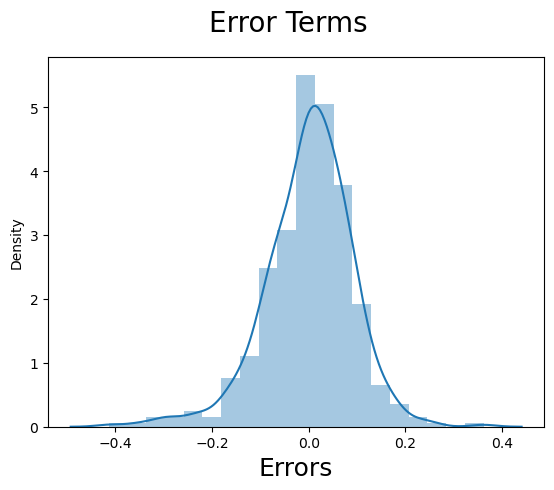

In [95]:
# Plotting histogram of the error terms

fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following the normal distribution

### Multi Colinearity

In [96]:
calcVIF(X_train_1)

,Features,VIF
2,temp,377.26
3,atemp,369.62
4,windspeed,4.86
10,Spring,2.57
11,Summer,2.46
0,yr,2.07
12,Winter,2.01
5,Aug,1.73
9,Misty,1.58
6,Feb,1.39


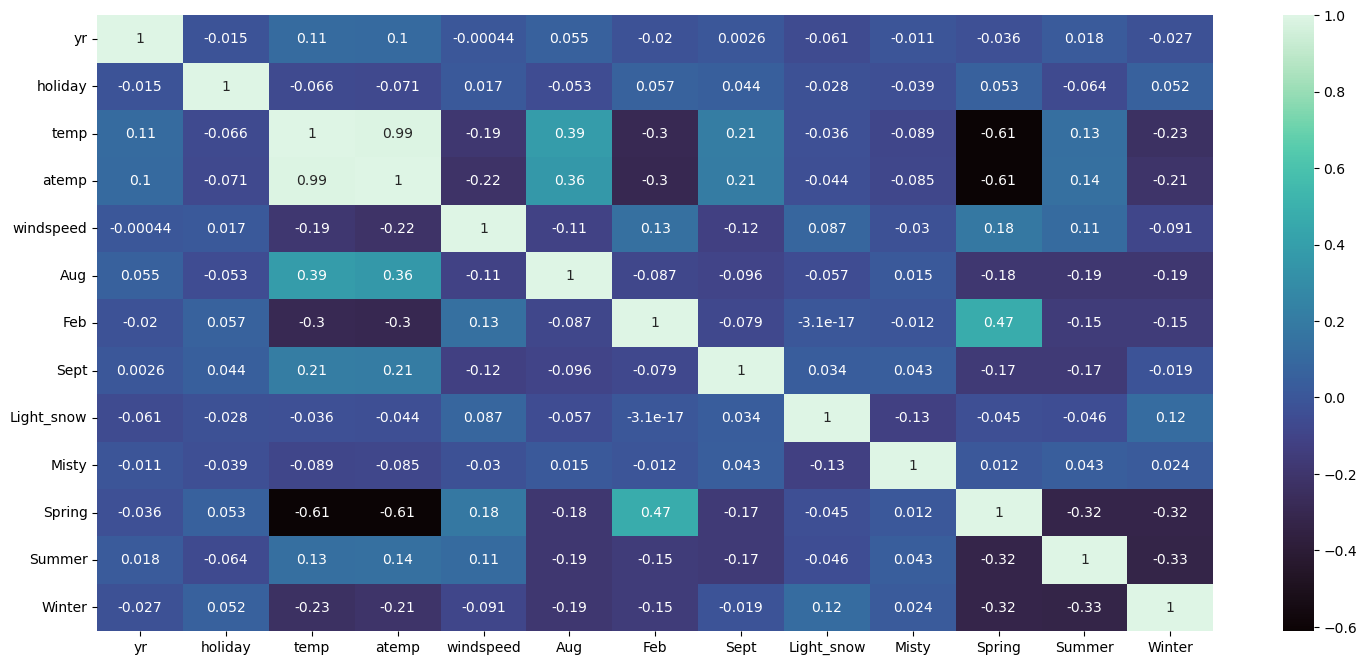

In [98]:
plt.figure(figsize=(18,8))
sns.heatmap(X_train_1.corr(),annot = True, cmap="mako")
plt.show()

Multicolinearity is not seen in the heatmap however VIF values are less than 5 which is good.

### Linearity

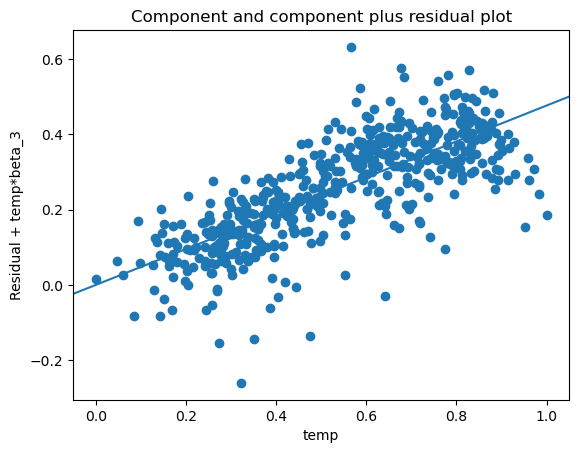

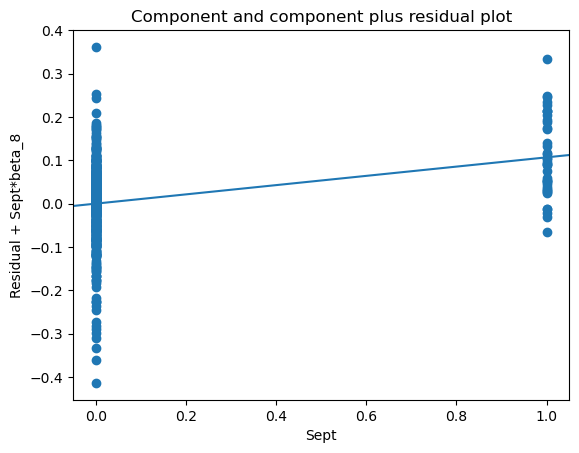

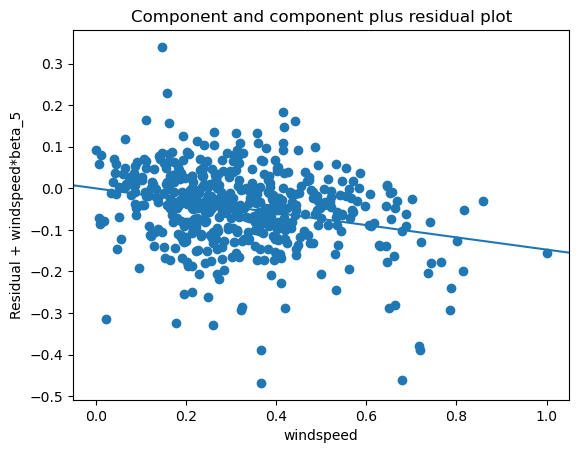

In [101]:
# Component and component plus residual plot
# Linear relationship validation using CCPR plot

sm.graphics.plot_ccpr(LR_3, 'temp')
plt.show()

sm.graphics.plot_ccpr(LR_3, 'Sept')
plt.show()

sm.graphics.plot_ccpr(LR_3, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

### Independence of residuals

Durbin-Watson value of final model LR_3 is 2.060, which signifies there is no autocorrelation.

# Predictions Using the Final Model

In [109]:
df_test.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,...,Mar,May,Nov,Oct,Sept,Light_snow,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,358.127273,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.127273,...,0.054545,0.086364,0.072727,0.086364,0.086364,0.027273,0.318182,0.254545,0.263636,0.236364
std,214.116582,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.334038,...,0.227609,0.281541,0.260281,0.281541,0.281541,0.163248,0.466833,0.436599,0.441609,0.425817
min,4.000000,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,171.500000,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.500000,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.750000,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,730.000000,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
Y_test = df_test.pop('cnt')
X_test = df_test

In [111]:
colm1 = X_train_1.columns

X_test = X_test[colm1]

In [112]:
# Adding constant variable to test dataframe
X_test_LM_3 = sm.add_constant(X_test)

In [113]:
Y_pred = LR_3.predict(X_test_LM_3)

In [116]:
r2 = r2_score(Y_test, Y_pred)
round(r2,4)

-5.7338

# 8.Model Evaluation

Text(0, 0.5, 'Y_pred')

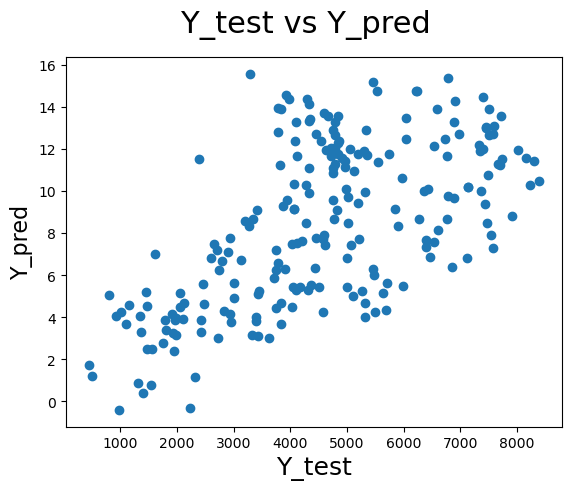

In [117]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize = 22) 
plt.xlabel('Y_test', fontsize = 18)
plt.ylabel('Y_pred', fontsize = 16) 

In [118]:
round(LR_3.params,4)

const         0.1710
yr            0.2334
holiday      -0.0957
temp          0.4764
atemp         0.0024
windspeed    -0.1473
Aug           0.0437
Feb           0.0044
Sept          0.1069
Light_snow   -0.2835
Misty        -0.0808
Spring       -0.0364
Summer        0.0822
Winter        0.1134
dtype: float64

In [119]:
# Calculating Adjusted-R^2 value for the test dataset

Adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(Adjusted_r2)

-6.1588


# Conclusion

### Demand of bikes highly depend on year, holiday, temp, windspeed, Sept, Light_snowrain, Misty, spring, summer and winter.